<a href="https://colab.research.google.com/github/JColeman1550/BASEBALL.github.io/blob/main/Seth_Lugo_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install pybaseball #access to statcast data
!pip install matplotlib
!pip install seaborn

In [ ]:
%%capture
import pybaseball as pyb
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Get Seth Lugo's pitching data
player_id = pyb.playerid_lookup('Lugo', 'Seth')['key_mlbam'].values[0]
lugo_pitching = pyb.statcast_pitcher('2023-01-01', '2023-12-31', player_id)

Gathering Player Data


In [ ]:
# Filter data for right handed and left handed hitters
lugo_rhh = lugo_pitching[lugo_pitching['stand'] == 'R']
lugo_lhh = lugo_pitching[lugo_pitching['stand'] == 'L']

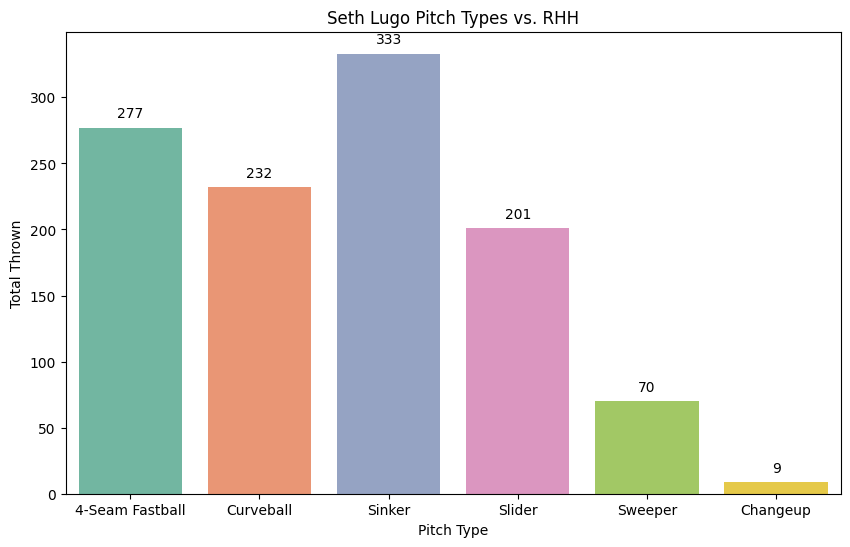

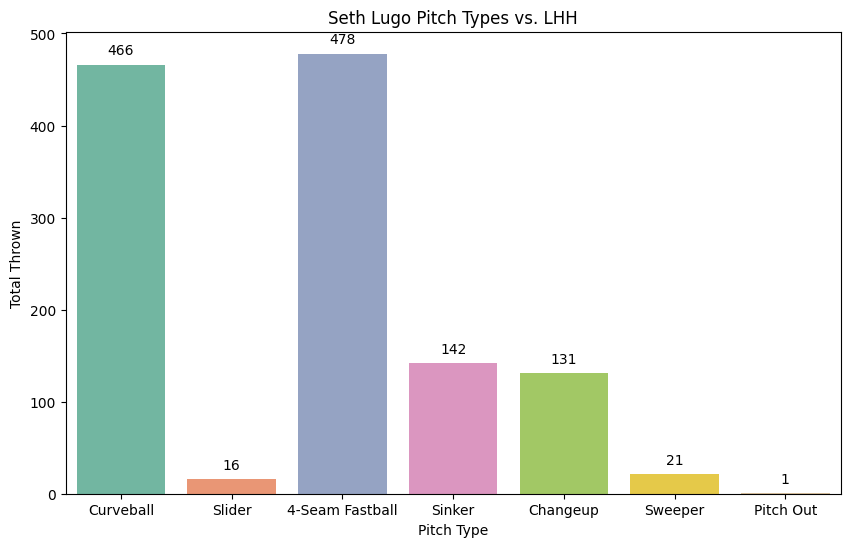

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#assign color to chart
custom_palette = sns.color_palette("Set2")


# Plot pitch types for RHH (excluding Pitch_Out and NaN)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='pitch_name', data=lugo_rhh, palette=custom_palette)

# Display count values above the bars for RHH
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

plt.title('Seth Lugo Pitch Types vs. RHH')
plt.xlabel('Pitch Type')
plt.ylabel('Total Thrown')
plt.show()

# Plot pitch types for LHH (excluding Pitch_Out and NaN)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='pitch_name', data=lugo_lhh, palette=custom_palette)

# Display count values above the bars for LHH
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

plt.title('Seth Lugo Pitch Types vs. LHH')
plt.xlabel('Pitch Type')
plt.ylabel('Total Thrown')
plt.show()



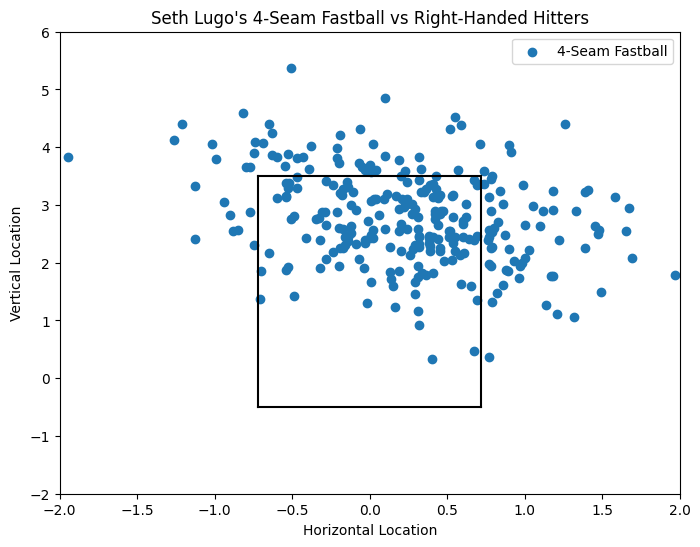

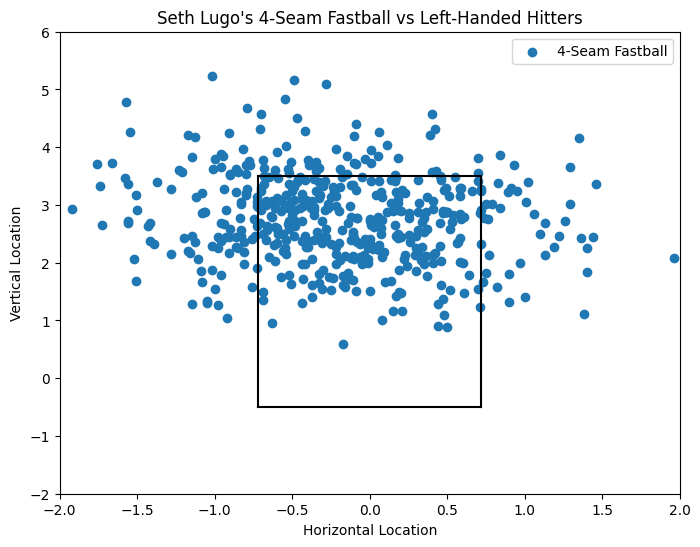

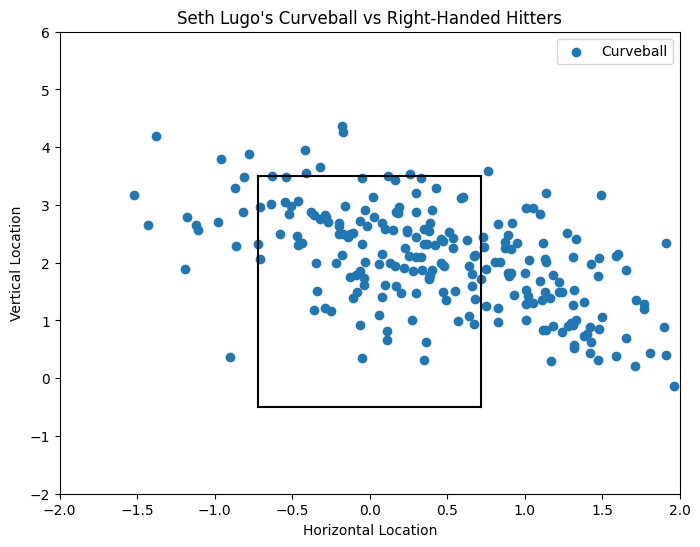

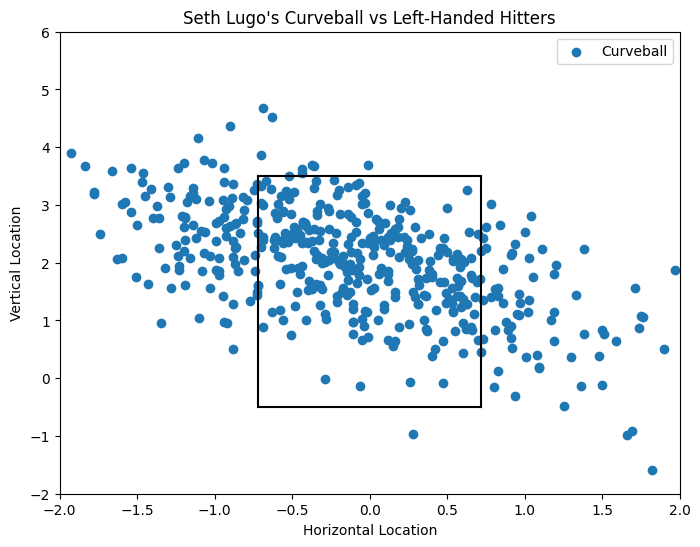

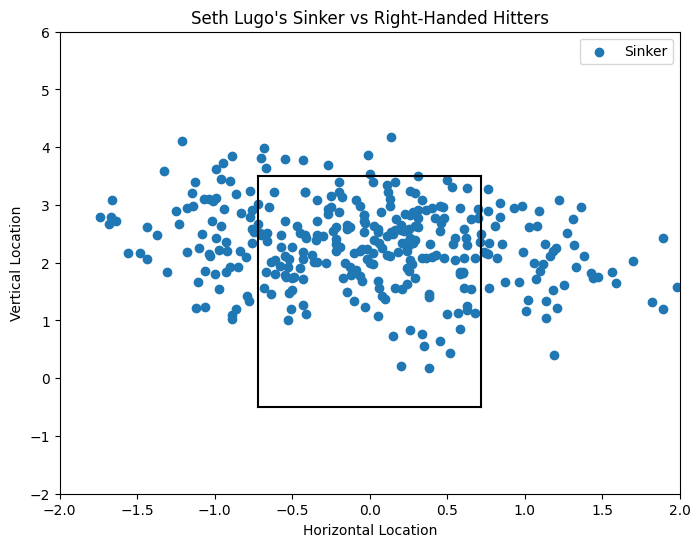

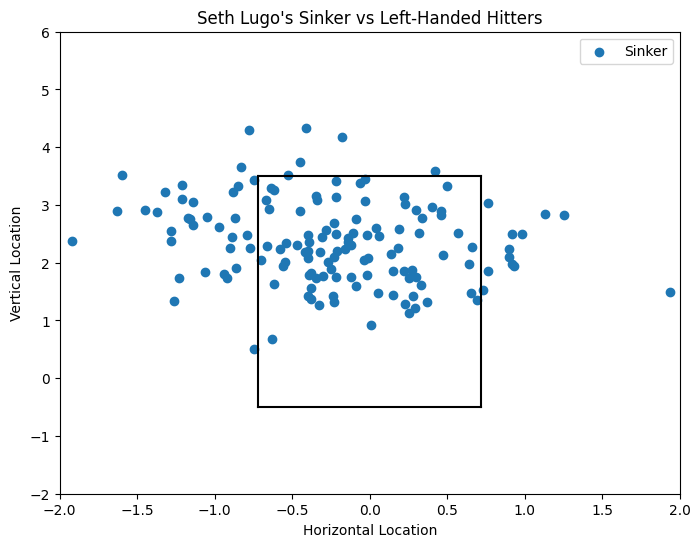

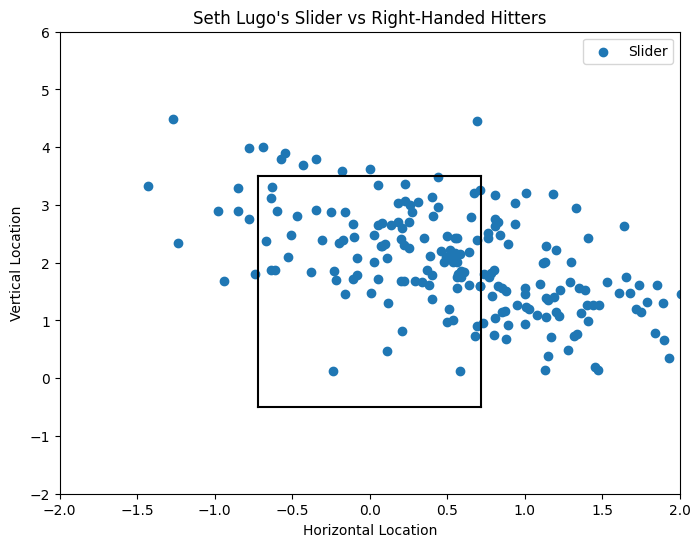

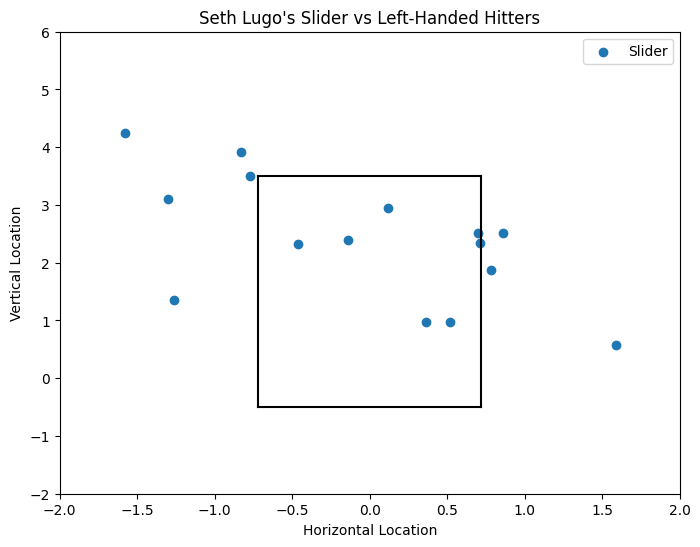

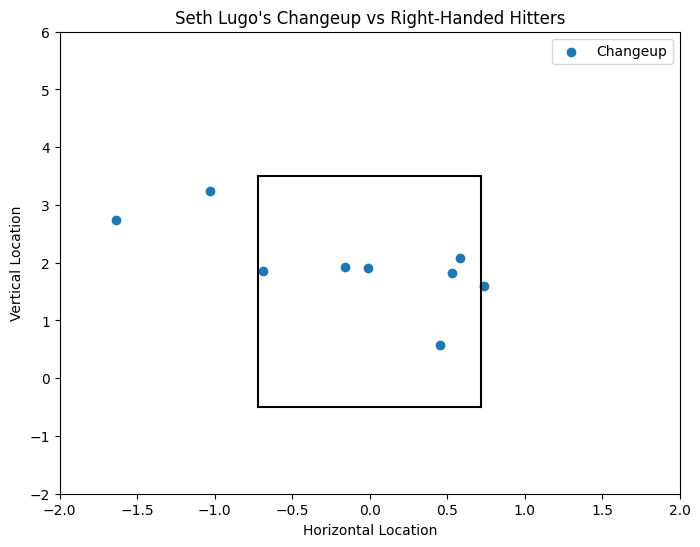

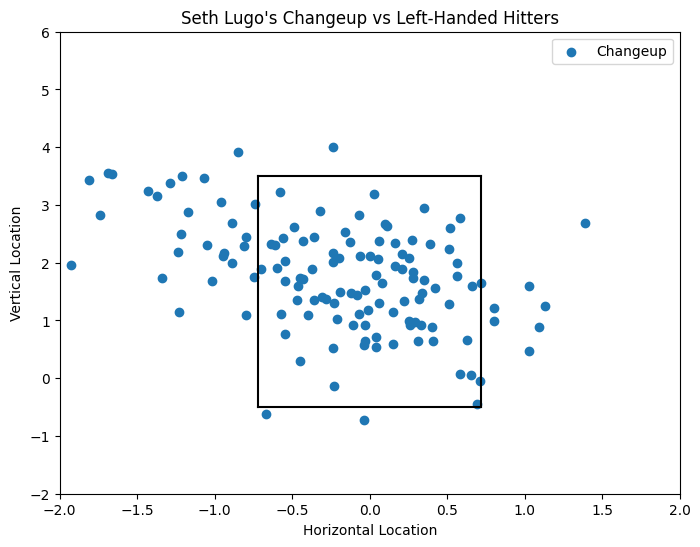

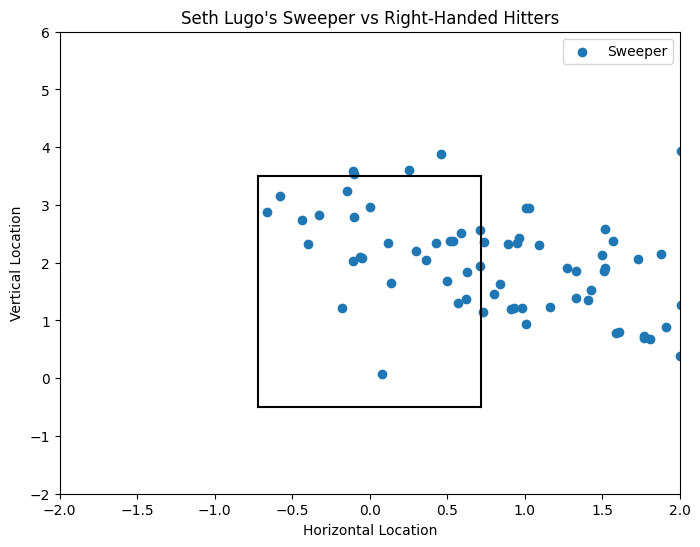

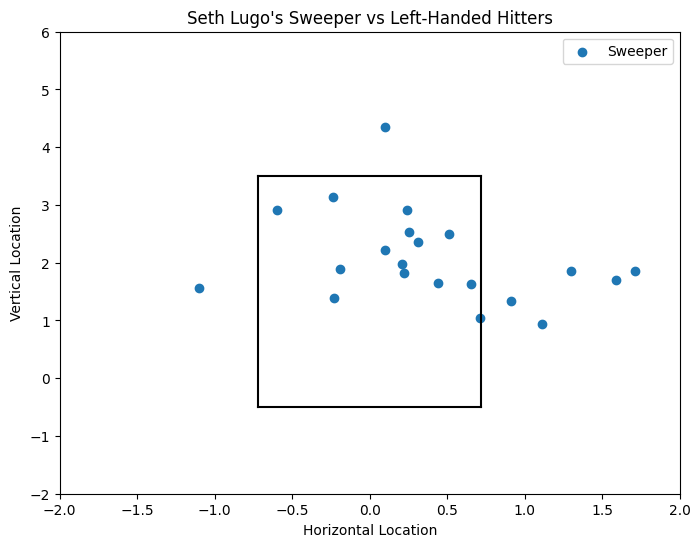

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
# plot pitch locations with strike zone overlay and consistent axis limits
def plot_pitch_with_strikezone(df, pitch_type, label):
    plt.figure(figsize=(8, 6))

    # Filter out 'Pitch_Out' and NaN values for the specified pitch_type
    df_filtered = df[(df['pitch_name'] == pitch_type) & (df['pitch_name'] != 'Pitch Out') & (~df['pitch_name'].isnull())]

    if not df_filtered.empty:
        # Plot pitch locations
        plt.scatter(df_filtered['plate_x'], df_filtered['plate_z'], label=pitch_type)

        # attempt to replicate MLB strike zone
        sz_top = 3.5
        sz_bottom = -0.5
        sz_left = -0.72
        sz_right = 0.72

        # Top of the strike zone
        plt.plot([sz_left, sz_right], [sz_top, sz_top], color='black')

        # Bottom of the strike zone
        plt.plot([sz_left, sz_right], [sz_bottom, sz_bottom], color='black')

        # Left side of the strike zone
        plt.plot([sz_left, sz_left], [sz_bottom, sz_top], color='black')

         # Right side of the strike zone
        plt.plot([sz_right, sz_right], [sz_bottom, sz_top], color='black')

        # Set consistent axis limits for each chart
        plt.xlim(-2, 2)
        plt.ylim(-2, 6)

        plt.title(f"Seth Lugo's {pitch_type} vs {label} Hitters")
        plt.xlabel("Horizontal Location")
        plt.ylabel("Vertical Location")
        plt.legend()
        plt.show()


unique_pitch_types = lugo_pitching['pitch_name'].unique()

# Plot for each pitch type against RHH and LHH
for pitch_type in unique_pitch_types:
    plot_pitch_with_strikezone(lugo_rhh, pitch_type, 'Right-Handed')
    plot_pitch_with_strikezone(lugo_lhh, pitch_type, 'Left-Handed')



In [ ]:
from pybaseball import playerid_lookup, statcast_pitcher
import pandas as pd

# Retrieve player ID for Seth Lugo
player_id = playerid_lookup('Lugo', 'Seth')['key_mlbam'].values[0]

# Statcast pitching data for Seth Lugo in the 2023 season
lugo_pitching = statcast_pitcher('2023-01-01', '2023-12-31', player_id)

# Filter data for Seth Lugo's pitches
lugo_pitches_2023 = lugo_pitching[lugo_pitching['pitcher'] == player_id]

# Create a new column for different counts
lugo_pitches_2023['count_in_atbat'] = lugo_pitches_2023['balls'].astype(str) + '-' + lugo_pitches_2023['strikes'].astype(str)

# Categorize pitches by handedness of batter
lugo_pitches_2023['batter_handedness'] = 'RHH'
lugo_pitches_2023.loc[lugo_pitches_2023['stand'] == 'L', 'batter_handedness'] = 'LHH'

# Calculate the total count of each pitch type in specific count at bat situations against RHH and LHH
pitch_counts = lugo_pitches_2023.groupby(['count_in_atbat', 'pitch_name', 'batter_handedness']).size()

# Calculate the total count of all pitch types in specific count at bat situations against RHH and LHH
total_counts = lugo_pitches_2023.groupby(['count_in_atbat', 'batter_handedness']).size()

# Calculate percentages of each pitch type thrown in specific count at bat situations against RHH and LHH
pitch_percentages = (pitch_counts / total_counts).fillna(0) * 100  # Convert to percentage

# Round the percentages to the nearest tenth
pitch_percentages_rounded = pitch_percentages.round(1)

# display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the calculated percentages
print("Percentages by count, pitch type, and batter handedness:")
print(pitch_percentages_rounded)






Gathering Player Data
Percentages by count, pitch type, and batter handedness:
count_in_atbat  batter_handedness  pitch_name     
0-0             LHH                4-Seam Fastball    36.2
                                   Changeup            4.1
                                   Curveball          38.0
                                   Sinker              8.1
                                   Slider              1.4
                                   Sweeper             0.9
                RHH                4-Seam Fastball    21.7
                                   Changeup            0.3
                                   Curveball          16.1
                                   Sinker             19.7
                                   Slider             20.8
                                   Sweeper             5.1
0-1             LHH                4-Seam Fastball    31.8
                                   Changeup           20.2
                                   Curveball

In [ ]:
# Categorize pitches by handedness of the batter (LHH/RHH)
lugo_pitches_2023['batter_handedness'] = 'RHH'
lugo_pitches_2023.loc[lugo_pitches_2023['stand'] == 'L', 'batter_handedness'] = 'LHH'

# Filter data for called strikes
called_strikes = lugo_pitches_2023[lugo_pitches_2023['description'].str.lower() == 'called_strike']

# Calculate the count of called strikes for each pitch type against LHH and RHH
called_strikes_count = called_strikes.groupby(['pitch_name', 'batter_handedness']).size()

# Calculate the total count of pitches thrown for each pitch type against LHH and RHH
total_pitches_count = lugo_pitches_2023.groupby(['pitch_name', 'batter_handedness']).size()

# Calculate the strike percentage for each pitch type against LHH and RHH
strike_percentages = (called_strikes_count / total_pitches_count).fillna(0) * 100  # Convert to percentage

# Round the strike percentages to the nearest tenth
strike_percentages_rounded = strike_percentages.round(1)

# Display the calculated strike percentages
print("Strike percentages by pitch type and batter handedness:")
print(strike_percentages_rounded)

Strike percentages (rounded to the nearest tenth) by pitch type and batter handedness for Seth Lugo in the 2023 season:
pitch_name       batter_handedness
4-Seam Fastball  LHH                  23.2
                 RHH                  20.2
Changeup         LHH                   8.4
                 RHH                   0.0
Curveball        LHH                  15.2
                 RHH                  13.8
Pitch Out        LHH                   0.0
Sinker           LHH                  24.6
                 RHH                  24.9
Slider           LHH                  18.8
                 RHH                  16.4
Sweeper          LHH                  14.3
                 RHH                  11.4
dtype: float64


In [ ]:
# Filter data for Seth Lugo's pitches and
# remove pitch out and nan values in pitch_name column
lugo_pitches_2023 = lugo_pitching[(lugo_pitching['pitcher'] == player_id) & (~lugo_pitching['pitch_name'].isin(['Pitch Out'])) & (lugo_pitching['pitch_name'].notnull())]

# Define the glove side
glove_side_zones = [1, 4, 7, 11, 14, 17, 21, 24, 27, 31, 34, 37]

# Filter pitches that landed in glove side
glove_side_pitches = lugo_pitches_2023[lugo_pitches_2023['zone'].isin(glove_side_zones)]

# Calculate the count of pitches in the glove side for each pitch type
glove_side_counts = glove_side_pitches.groupby(['pitch_name']).size()

# Calculate the total count of pitches thrown for each pitch type
total_counts = lugo_pitches_2023.groupby(['pitch_name']).size()

# Calculate the percentages of pitches in the glove side for each pitch type
glove_side_percentages = (glove_side_counts / total_counts).fillna(0) * 100  # Convert to percentage

# Round the percentages to the nearest tenth
glove_side_percentages_rounded = glove_side_percentages.round(1)

# Display the calculated percentages for glove side zones by pitch type
print("Pitch percentages glove side by pitch type:")
print(glove_side_percentages_rounded)

Pitch percentages (rounded to the nearest tenth) in glove side zones by pitch type for Seth Lugo in the 2023 season:
pitch_name
4-Seam Fastball    43.8
Changeup           46.4
Curveball          54.7
Sinker             43.6
Slider             52.1
Sweeper            53.8
dtype: float64


In [ ]:
# Define the middle zones
middle_zones = [2, 5, 8, 12, 18, 22, 28, 32, 38]

# Filter pitches that landed in middle
middle_pitches = lugo_pitches_2023[lugo_pitches_2023['zone'].isin(middle_zones)]

# Calculate the count of pitches in the middle for each pitch type
middle_counts = middle_pitches.groupby(['pitch_name']).size()

# Calculate the total count of pitches thrown for each pitch type
total_counts = lugo_pitches_2023.groupby(['pitch_name']).size()

# Calculate the percentages of pitches in the middle for each pitch type
middle_percentages = (middle_counts / total_counts).fillna(0) * 100  # Convert to percentage

# Round the percentages to the nearest tenth
middle_percentages_rounded = middle_percentages.round(1)

# Display the calculated percentages for middle by pitch type
print("Pitch percentages in middle by pitch type:")
print(middle_percentages_rounded)

Pitch percentages (rounded to the nearest tenth) in middle zones by pitch type for Seth Lugo in the 2023 season:
pitch_name
4-Seam Fastball    31.3
Changeup           18.6
Curveball          21.1
Sinker             29.9
Slider             22.1
Sweeper            27.5
dtype: float64


In [ ]:
# Define the arm side zones
arm_side_zones = [3, 6, 9, 13, 16, 19, 23, 26, 29, 33, 36, 39]

# Filter pitches that landed in arm side
arm_side_pitches = lugo_pitches_2023[lugo_pitches_2023['zone'].isin(arm_side_zones)]

# Calculate the count of pitches in the arm side for each pitch type
arm_side_counts = arm_side_pitches.groupby(['pitch_name']).size()

# Calculate the total count of pitches thrown for each pitch type
total_counts = lugo_pitches_2023.groupby(['pitch_name']).size()

# Calculate the percentages of pitches in the arm side for each pitch type
arm_side_percentages = (arm_side_counts / total_counts).fillna(0) * 100  # Convert to percentage

# Round the percentages to the nearest tenth
arm_side_percentages_rounded = arm_side_percentages.round(1)

# Display the calculated percentages for arm side zones by pitch type
print("Pitch percentages arm side zones by pitch type:")
print(arm_side_percentages_rounded)

Pitch percentages (rounded to the nearest tenth) in arm side zones by pitch type for Seth Lugo in the 2023 season:
pitch_name
4-Seam Fastball    24.9
Changeup           35.0
Curveball          24.2
Sinker             26.5
Slider             25.8
Sweeper            18.7
dtype: float64


In [ ]:
# Define the zones for glove side, middle, and arm side
glove_side_zones = [1, 4, 7, 11, 14, 17, 21, 24, 27, 31, 34, 37]
middle_zones = [2, 5, 8, 12, 18, 22, 28, 32, 38]
arm_side_zones = [3, 6, 9, 13, 16, 19, 23, 26, 29, 33, 36, 39]

# Filter pitches for LHH and RHH
lhh_pitches = lugo_pitches_2023[lugo_pitches_2023['stand'] == 'L']
rhh_pitches = lugo_pitches_2023[lugo_pitches_2023['stand'] == 'R']

# find pitch percentages for specified zones
def calculate_zone_percentages(pitches, zones):
    zone_pitches = pitches[pitches['zone'].isin(zones)]
    zone_counts = zone_pitches.groupby(['pitch_name']).size()
    total_counts = pitches.groupby(['pitch_name']).size()
    zone_percentages = (zone_counts / total_counts).fillna(0) * 100
    zone_percentages_rounded = zone_percentages.round(1)
    return zone_percentages_rounded

# percentages for glove side, middle, and arm side for LHH and RHH
glove_side_lhh = calculate_zone_percentages(lhh_pitches, glove_side_zones)
middle_lhh = calculate_zone_percentages(lhh_pitches, middle_zones)
arm_side_lhh = calculate_zone_percentages(lhh_pitches, arm_side_zones)

glove_side_rhh = calculate_zone_percentages(rhh_pitches, glove_side_zones)
middle_rhh = calculate_zone_percentages(rhh_pitches, middle_zones)
arm_side_rhh = calculate_zone_percentages(rhh_pitches, arm_side_zones)

# Display the calculated percentages for each zone and handedness
print("Pitch percentages glove side - LHH:")
print(glove_side_lhh)
print("\nPitch percentages middle - LHH:")
print(middle_lhh)
print("\nPitch percentages arm side - LHH:")
print(arm_side_lhh)

print("\nPitch percentages glove side - RHH:")
print(glove_side_rhh)
print("\nPitch percentages middle - RHH:")
print(middle_rhh)
print("\nPitch percentages arm side RHH:")
print(arm_side_rhh)

Pitch percentages glove side - LHH:
pitch_name
4-Seam Fastball    49.4
Changeup           46.6
Curveball          54.9
Sinker             47.2
Slider             56.2
Sweeper            33.3
dtype: float64

Pitch percentages middle - LHH:
pitch_name
4-Seam Fastball    28.5
Changeup           18.3
Curveball          20.0
Sinker             28.9
Slider             18.8
Sweeper            42.9
dtype: float64

Pitch percentages arm side - LHH:
pitch_name
4-Seam Fastball    22.2
Changeup           35.1
Curveball          25.1
Sinker             23.9
Slider             25.0
Sweeper            23.8
dtype: float64

Pitch percentages glove side - RHH:
pitch_name
4-Seam Fastball    34.3
Changeup           44.4
Curveball          54.3
Sinker             42.0
Slider             51.7
Sweeper            60.0
dtype: float64

Pitch percentages middle - RHH:
pitch_name
4-Seam Fastball    36.1
Changeup           22.2
Curveball          23.3
Sinker             30.3
Slider             22.4
Sweeper        

In [ ]:
average_velocities = lugo_pitches_2023.groupby('pitch_name')['release_speed'].mean().round(1)

print(average_velocities)

pitch_name
4-Seam Fastball    93.4
Changeup           86.2
Curveball          79.6
Sinker             93.2
Slider             85.8
Sweeper            81.4
Name: release_speed, dtype: float64


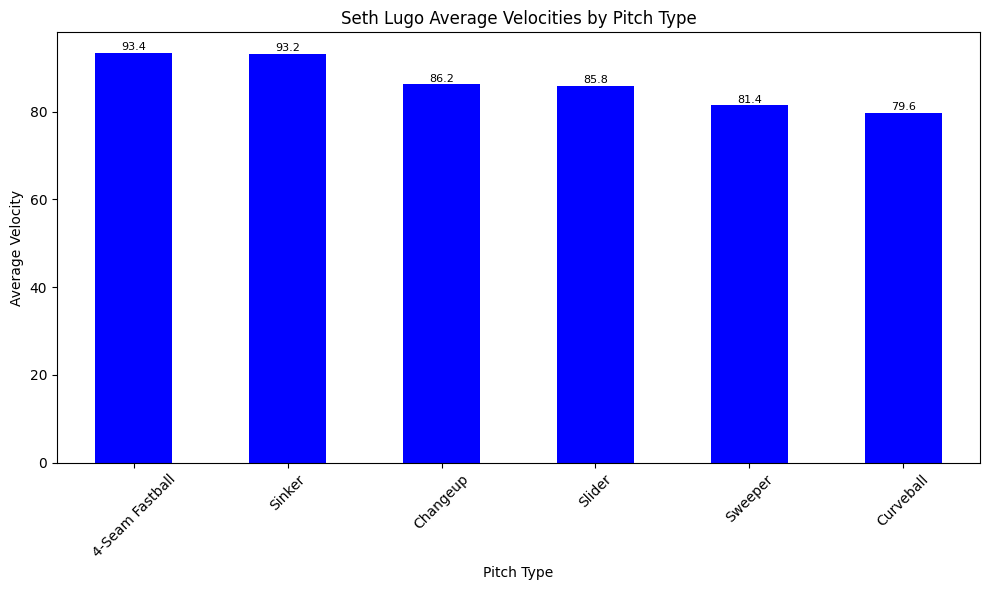

In [ ]:
# bar plot of average velocities with values on top of each bar
plt.figure(figsize=(10, 6))
ax = sorted_velocities.plot(kind='bar', color='blue')

# Add values on top of the bars
for i, v in enumerate(sorted_velocities):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=8)

plt.title('Seth Lugo Average Velocities by Pitch Type')
plt.xlabel('Pitch Type')
plt.ylabel('Average Velocity')
plt.xticks(rotation=45)  # Rotates labels on x-axis, easier to read
plt.tight_layout()
plt.show()